In [105]:
# (1) How can hotels predict a Tripadvisor review?
# (2) What amenities should hotels prioritize in order to ensure the highest review?

# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import classification_report


In [106]:
df = pd.read_excel('C:/Users/Scoldingatom/Downloads/vegastripadvisor.xlsx')
df

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday


In [107]:
# Examine column headers and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    object
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [108]:
# looking to spot any outstanding outliers 
df.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


In [109]:
# Examine the number of nulls -- found none -- data is clean
df.isnull().sum()

User country         0
Nr. reviews          0
Nr. hotel reviews    0
Helpful votes        0
Score                0
Period of stay       0
Traveler type        0
Pool                 0
Gym                  0
Tennis court         0
Spa                  0
Casino               0
Free internet        0
Hotel name           0
Hotel stars          0
Nr. rooms            0
User continent       0
Member years         0
Review month         0
Review weekday       0
dtype: int64

In [110]:
# Examine number of duplicates -- found none
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
499    False
500    False
501    False
502    False
503    False
Length: 504, dtype: bool

In [111]:
# FIND AMENITIES THAT RESULT IN HIGHEST SCORE

C:\Users\Scoldingatom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


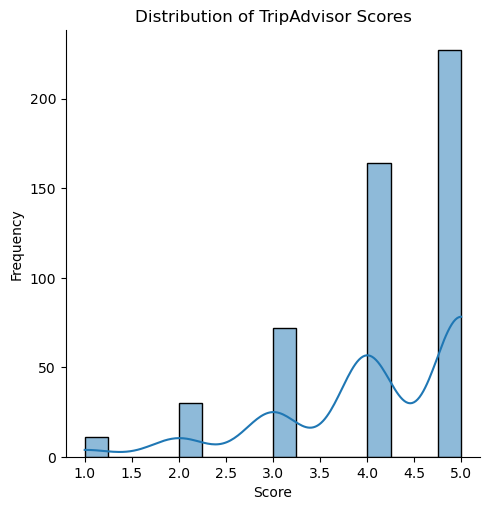

In [112]:
sns.displot(df['Score'], kde=True)
plt.title('Distribution of TripAdvisor Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [113]:
# Generate the correlation matrix of all numeric variables (0.5 pts)
df2 = df.select_dtypes(include=['number'])
df2.corr()
# We see that there is not much correlation to score. 

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
Nr. reviews,1.000000,0.655080,0.790696,-0.024320,-0.136580,0.022783
Nr. hotel reviews,0.655080,1.000000,0.764322,0.013718,-0.128896,0.023696
Helpful votes,0.790696,0.764322,1.000000,0.015472,-0.099148,0.024259
Score,-0.024320,0.013718,0.015472,1.000000,-0.080200,-0.036190
Nr. rooms,-0.136580,-0.128896,-0.099148,-0.080200,1.000000,-0.024491
Member years,0.022783,0.023696,0.024259,-0.036190,-0.024491,1.000000


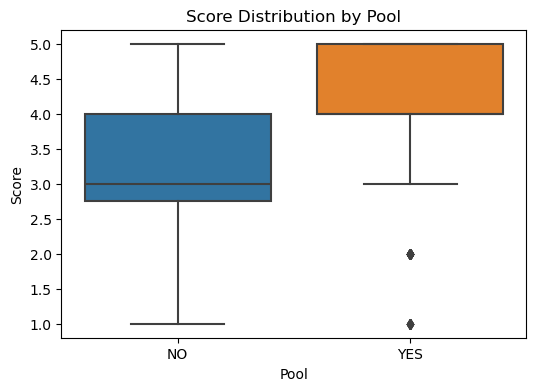

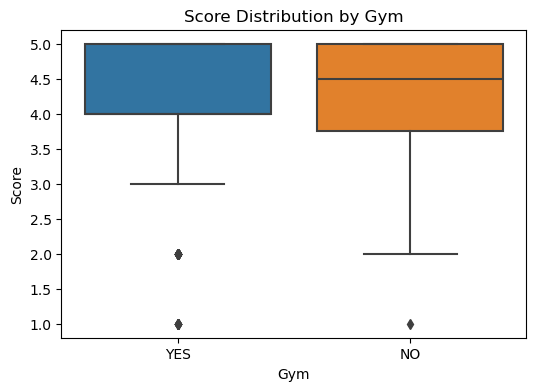

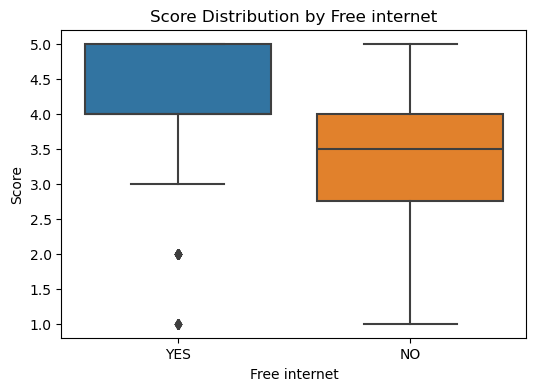

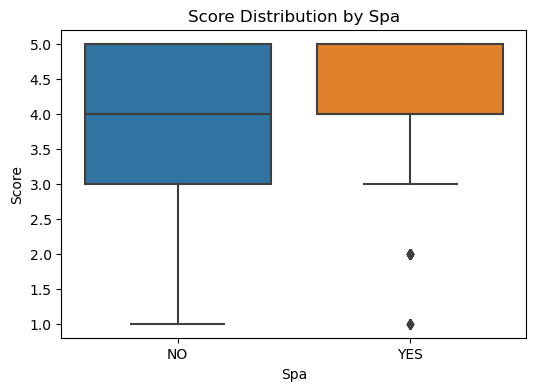

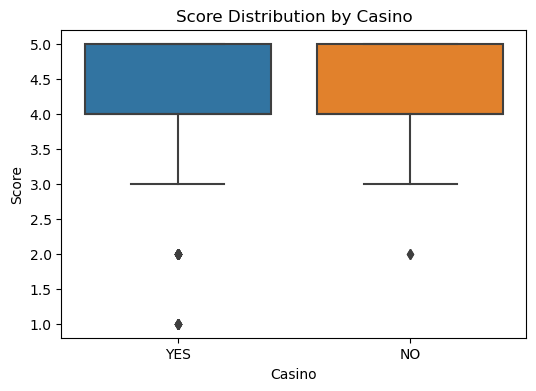

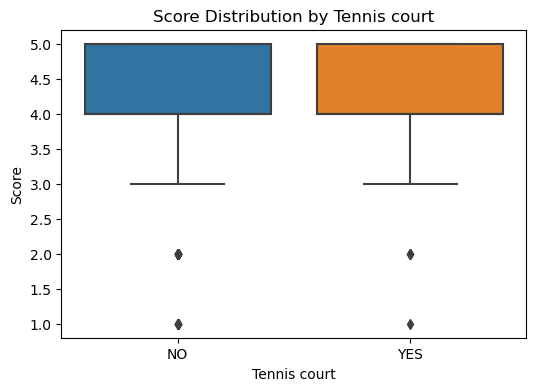

In [114]:
# Explore how each amenity impacts score
amenities = ['Pool', 'Gym', 'Free internet', 'Spa', 'Casino', 'Tennis court']
# A for loop that iterates through the list of amenities and creates a box plot for the impact on score.
for amenity in amenities:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=amenity, y='Score', data=df)
    plt.title(f'Score Distribution by {amenity}')
    plt.show()

# We discovered free internet, pool, gym, spa, casino, and tennis are the order of importance. 
# free internet and pool were by far the most impactful showing the lowest score averages when its not there. 

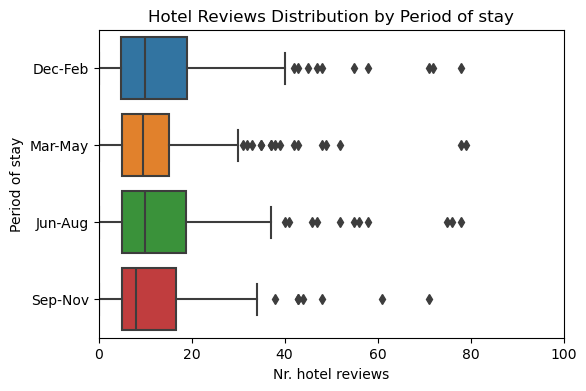

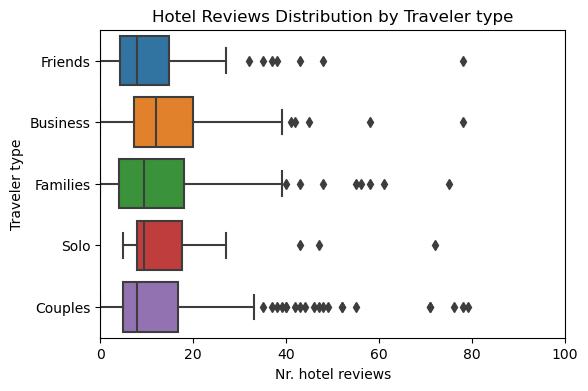

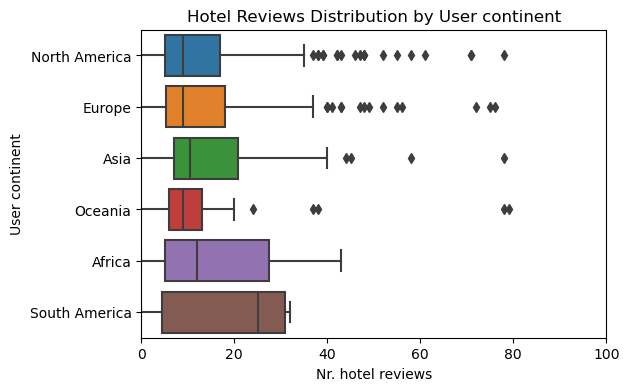

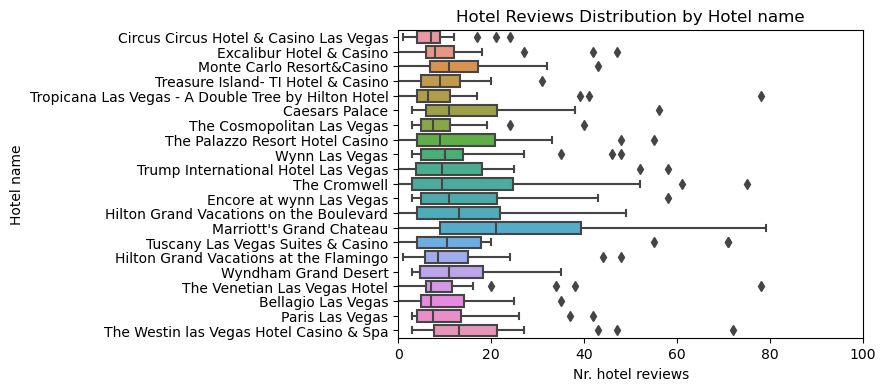

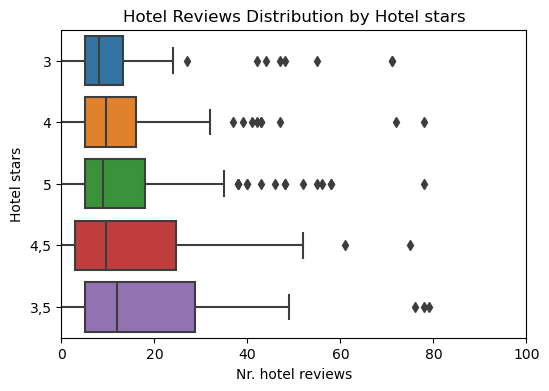

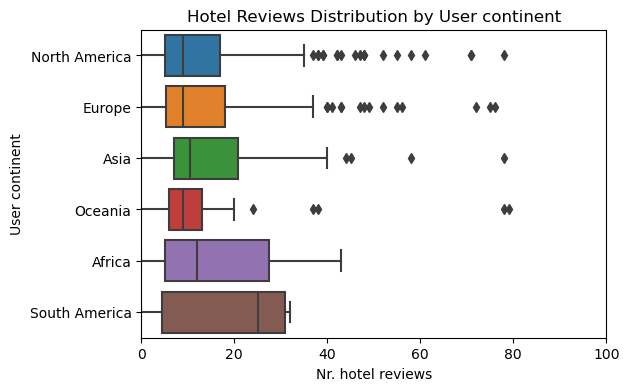

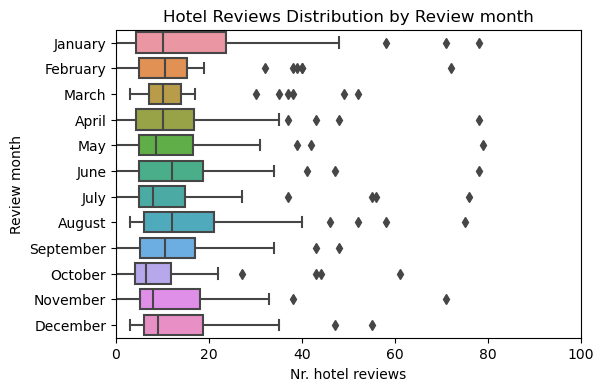

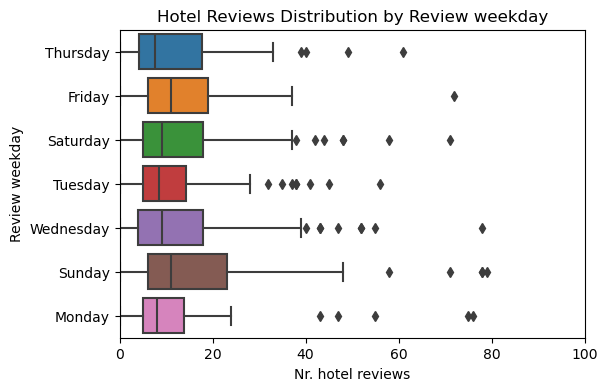

In [115]:
misc_factors = ['Period of stay', 'Traveler type', 'User continent', 'Hotel name', 'Hotel stars', 'User continent',
               'Review month','Review weekday']
# A for loop that iterates through the list of other factors and creates a box plot for the impact on score.
for factors in misc_factors:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Nr. hotel reviews', y=factors, data=df)
    plt.title(f'Hotel Reviews Distribution by {factors}')
    plt.xlim(0, 100)
    plt.show()
    

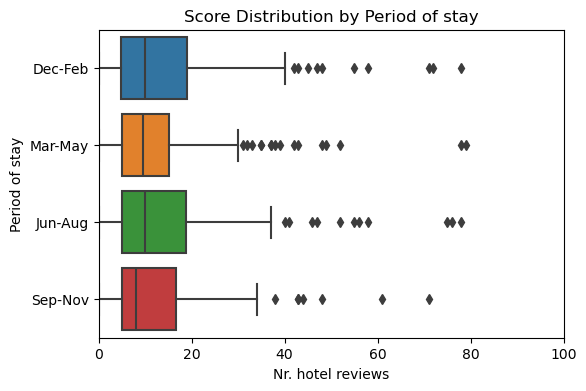

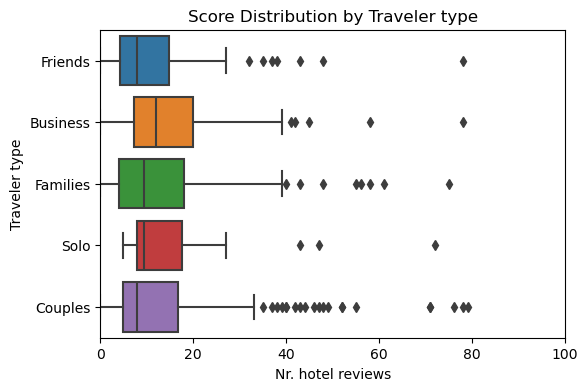

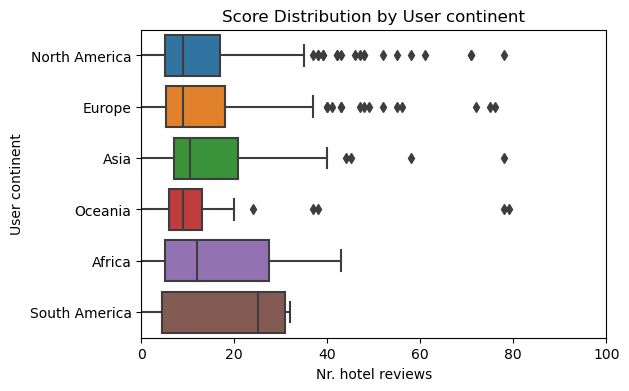

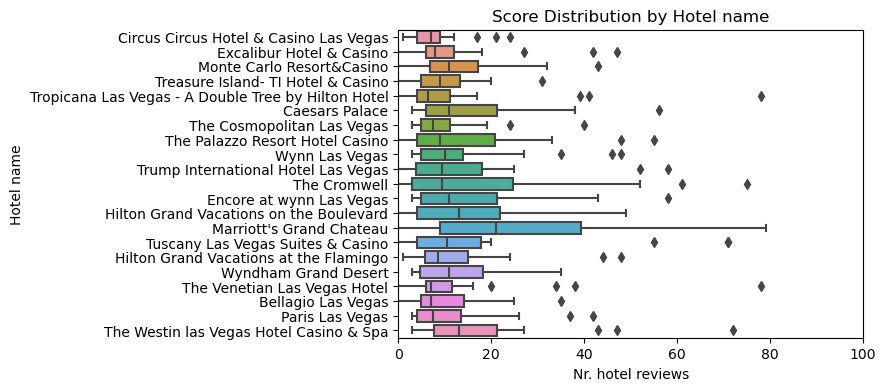

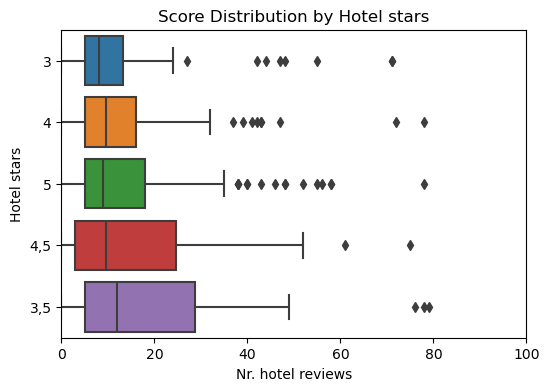

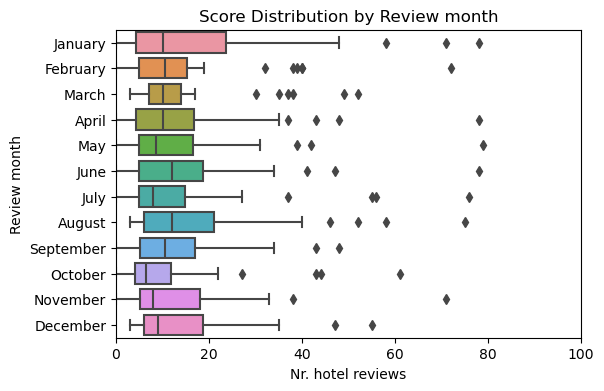

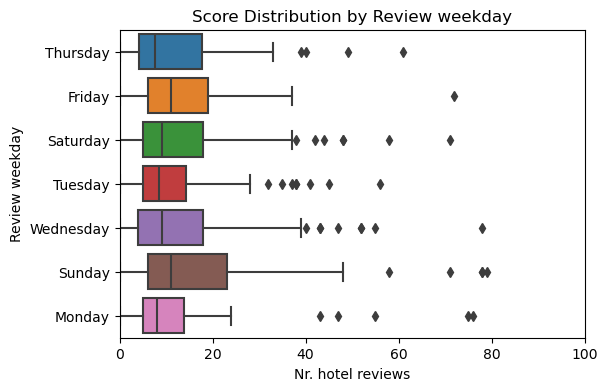

In [116]:
misc_factors = ['Period of stay', 'Traveler type', 'User continent', 'Hotel name', 'Hotel stars',
               'Review month','Review weekday']
# A for loop that iterates through the list of other factors and creates a box plot for the impact on score.
for factors in misc_factors:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Nr. hotel reviews', y=factors, data=df)
    plt.title(f'Score Distribution by {factors}')
    plt.xlim(0, 100)
    plt.show()
    